<a href="https://colab.research.google.com/github/cerfs21/deep_solar_app/blob/main/0_ml_basics_exercice_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on tutorial: Machine Learning - basics
**Author:** Dr. Habiboulaye {@gmail.com}

This hand-on tutorial will conver:

* Linear Regression
* Polynomial Regression
* Ridge Regression
(This notebook is inspired by the work of Animesh Agarwal)

## Populating the namespace

In [ ]:
import numpy as np
import operator
import matplotlib.pyplot as plt
%matplotlib inline
colors = ['seagreen','blue', 'darkorange', 'indigo', 'yellow', 'purple', 'violet', 'turquoise']

## Data Generation

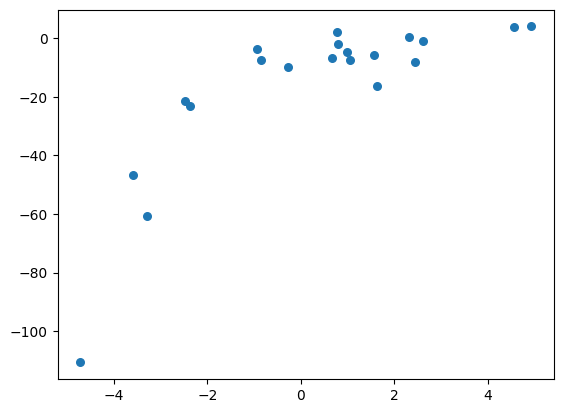

In [ ]:
#Generate data
np.random.seed(0)
N = 20
x_orig = 2 - 3 * np.random.normal(0, 1, N)
y_orig = x_orig - 2 * (x_orig ** 2) + 0.5 * (x_orig ** 3) + np.random.normal(-5, 5, N)

# transforming the data to include another axis
x = x_orig[:, np.newaxis]
y = y_orig[:, np.newaxis]
plt.scatter(x,y, s=30)
plt.show()

<font color='red'>
<b>EXERCICES</b>: Replace the <b>FILL_IN</b> pattern with the correct codes then execute the cell
 </font>

## Linear Regression  

* Take a look at the scikit-learn user guide for more details on [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) api

rmse: 16.924817575403132


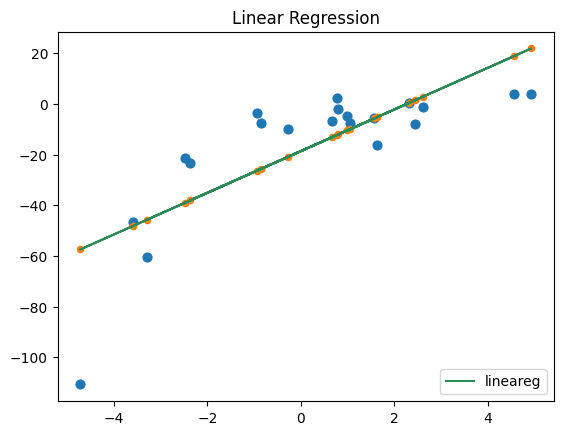

rmse: 16.924817575403132
r2  : 0.6049187123282771


In [ ]:
# Import the linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression
# Import the mean_squared_error metric
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
# Instanciate a linear model using the class LinearRegression with default parameters
model = LinearRegression()
# Use the method fit to train the model with input data x and output y
model.fit(x, y)
# Use the trained model to predict output y_pred from input x
y_pred = model.predict(x)
# Performance metrics
rmse = np.sqrt(MSE(y,y_pred))
print('rmse:',rmse)

# plot the model
plt.scatter(x, y, s=40)
plt.title('Linear Regression')
plt.plot(x, y_pred, color=colors[0],label='lineareg')
plt.scatter(x, y_pred, s=20)
plt.legend(loc="lower right")
plt.show()
# Performance metrics
rmse = np.sqrt(MSE(y,y_pred))
r2 = r2_score(y,y_pred)
print('rmse:',rmse)
print('r2  :', r2)

<font color='red'>
    
**Conclusion**:   
The RMSE is significant compared to the spectrum of y values, i.e. 16 compared to [-60, 0], which indicates a rather poor representation of the target.   
The R2 metric indicates that this model represents around 60% of the variance of the target variable, which again indicates a rather poor representation of the target.   
This leads to consider more complex models to better fit these data.

</font>

## Polynomial Regression: linear model with polynomial features

To overcome under-fitting, we need to **increase the complexity of the model**.  
**Idea**: convert the original features into their higher order terms we will use the [**PolynomialFeatures**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class provided by **scikit-learn**. Next, we train the model using Linear Regression.


instance:0: poly_degree: 1
rmse 16.924817575403132
0.6049187123282771
instance:1: poly_degree: 4
rmse 5.560421255562293
0.9573564003349706
instance:2: poly_degree: 10
rmse 3.3739957126007853
0.9842989925127904


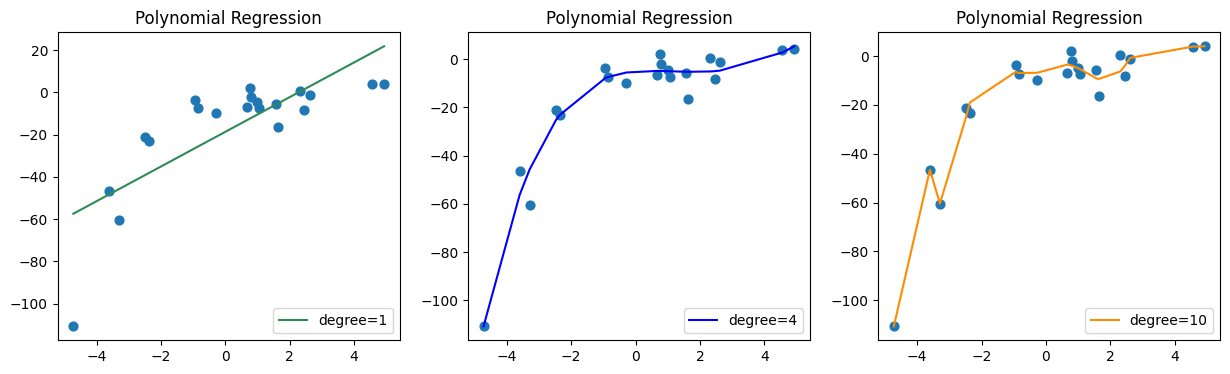

poly_features
without poly_features: [-4.7226796]
adding  poly_features: [ 1.00000000e+00 -3.29215704e+00  1.08382980e+01 -3.56813789e+01
  1.17468703e+02 -3.86725416e+02  1.27316080e+03 -4.19144529e+03
  1.37988961e+04 -4.54281330e+04  1.49556548e+05]


In [ ]:
import operator
import numpy as np
from sklearn.linear_model import LinearRegression
# Import the package polynomial features generation package
from sklearn.preprocessing import PolynomialFeatures


# Instanciate a new Linear Regression model
model = LinearRegression()
plt.figure(figsize=(15,4))
# Create Polynomial features with degree 1, then 4 then, 10 (from original input x => (x^0, x^1, ...x^degree)
for i,degree in enumerate([1,4,10]):
    # transforming the data to include another axis
    x = x_orig[:, np.newaxis]
    y = y_orig[:, np.newaxis]
    print('instance:{}: poly_degree: {}'.format(i,degree))
    # Create an instance of class PolynomialFeatures
    polynomial_features = PolynomialFeatures(degree=degree)
    lin_reg = LinearRegression()
    # Use fit_transform method of class PolynomialFeatures to create new features vector x_poly
    x_poly = polynomial_features.fit_transform(x)
    # Train the model using the polynomial features vector x_poly and output y
    lin_reg.fit(x_poly, y)
    # Use the trained model to predict output from vector x_poly
    y_poly_pred = lin_reg.predict(x_poly)
    # Performance
    rmse = np.sqrt(MSE(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print('rmse',rmse)
    print(r2)
    # plot
    plt.subplot(1,3,1+i)
    plt.scatter(x, y, s=40)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color=colors[i], label='degree='+str(degree))
    plt.title('Polynomial Regression')
    plt.legend(loc="lower right")
plt.show()

print('poly_features')
print('without poly_features:', x[0])
print('adding  poly_features:', x_poly[0])

**Conclusion**:   
Degree 1 is the same as Linear Regression: see results above.
Degrees 4 and 10 provide excellent results for both RMSE and R2: error and contribution to variance are optimal. Yet degree 10 seems to suffer from overfitting as specially visible for the 3rd x value on the graph.

## Ridge Regression: Overffiting and Regularization
* Take a look at the scikit-learn user guide for more details on [RidgeRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) api  
λ (i.e penalty_lambda) is the tuning parameter that decides how much we want to penalize the flexibility of our model.   
 - When λ = 0, the penalty term has no eﬀect, and the estimates produced by ridge regression will be equal to least squares.   
 - However, as λ→∞, the impact of the shrinkage penalty grows, and the ridge regression coeﬃcient estimates will approach zero.

instance:0: poly_degree: 10
rmse 3.3739957126007845
0.9842989925127905
instance:1: poly_degree: 10
rmse 4.014901984466652
0.977767496845675
instance:2: poly_degree: 10
rmse 4.763789291074033
0.9687000563618593


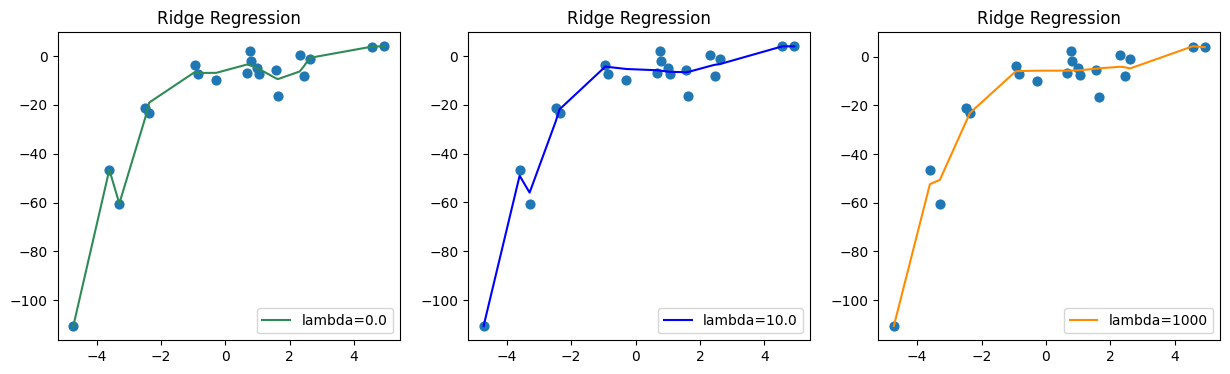

In [ ]:

# Import the Ridge regressor from sklearn linear model
from sklearn.linear_model import Ridge

plt.figure(figsize=(15,4))

# Loop for varying the penalty_lambda to see the regulation impact on overfitting (of previous model)
for i,penalty_lambda in enumerate([0.,10.,1000]):
    # transforming the data to include another axis
    x = x_orig[:, np.newaxis]
    y = y_orig[:, np.newaxis]
    print('instance:{}: poly_degree: {}'.format(i,10))
    polynomial_features= PolynomialFeatures(degree=10)
    x_poly = polynomial_features.fit_transform(x)
    # Create an instance of Rigde Regression model with parameter alpha = penalty_lambda
    model = Ridge(alpha=penalty_lambda)
    # Train the Ridge using the polynomial features vector x_poly and output y
    model.fit(x_poly, y)
    # Use the trained model to predict output from vector x_poly
    y_poly_pred = model.predict(x_poly)
    # Performance
    rmse = np.sqrt(MSE(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print('rmse',rmse)
    print(r2)
    # plot
    plt.subplot(1,3,1+i)
    plt.scatter(x, y, s=40)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color=colors[i], label='lambda='+str(penalty_lambda))
    plt.title('Ridge Regression')
    plt.legend(loc="lower right")
plt.show()

**Conclusion**: ??

## Lasso Regression: Conduct your own experiments (bonus)
* Find Lasso model api on [scikit-learn documentation](https://scikit-learn.org/stable/) and take a look for more details

* For any question: Keep in mind that [*ChatGPT*](https://chat.openai.com/) and [*Google*](https://www.google.com/) are your friends.